# Main Components
graph()
state
edges
nodes
invoke
stategraph()

In [146]:
from dotenv import load_dotenv
load_dotenv()

True

In [147]:
def funtion1(input):
    return input + " first function"

def function2(input):
    return input + " padhy second function"

def function3(input):
    return input + " third function"

In [148]:
from langgraph.graph import Graph

In [149]:

workflow1=Graph()


In [150]:
workflow1.add_node("fun1",function1)

In [151]:
workflow1.add_node("fun2",function2)

In [152]:
workflow1.add_edge("fun1","fun2")

In [153]:
workflow1.set_entry_point("fun1")

In [154]:
workflow1.set_finish_point("fun2")


In [155]:
app=workflow1.compile()

In [156]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

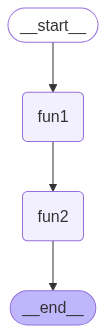

In [157]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))





In [158]:
app.invoke("hi this is pratap")

'hi this is pratap first function padhy second function'

In [159]:
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fun1
_______
hi this is rohit first function


here is output from fun2
_______
hi this is rohit first function padhy second function




In [160]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [161]:
def token_counter(input):
    token = input.split()
    token_length=len(token)
    return f"Total token number is generated from the input is {token_length}"

In [162]:
workflow2=Graph()

In [163]:
workflow2.add_node("My_LLM", llm)

In [164]:
workflow2.add_node("LLM_output_token_counter", token_counter)

In [165]:
workflow2.add_edge("My_LLM", "LLM_output_token_counter")

In [166]:
workflow2.set_entry_point("My_LLM")

In [167]:
workflow2.set_finish_point("LLM_output_token_counter")

In [168]:
app= workflow2.compile()

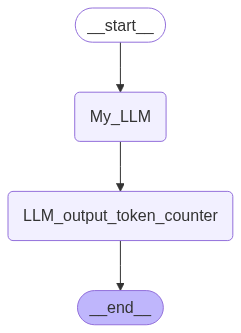

In [169]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [170]:
app.invoke("can you please tell me the India's capital")

'Total token number is generated from the input is 5'

In [171]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai.  It's not a single entity but a network of over 100 operating companies, spanning a diverse range of industries and employing millions of people globally.  Understanding its complexity requires looking at several key aspects:

**I. History and Structure:**

* **Origins:** The group's history traces back to 1868 with the establishment of a trading company by Jamsetji Tata.  His visionary leadership laid the foundation for the group's subsequent diversification and growth.
* **Structure:** The Tata Group isn't a traditional pyramid structure.  It's a complex web of holding companies, subsidiaries, and associated companies.  Tata Sons is the principal investment holding company, owning stakes in various group companies.  While there's a degree of centralized control, individual companies operate with significant aut